In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds

%matplotlib inline

In [4]:
imdb, info = tfds.load('imdb_reviews', with_info = True, as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.3CQXF4_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.3CQXF4_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.3CQXF4_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [5]:
type(imdb)

dict

In [6]:
imdb.keys()

dict_keys([Split('train'), Split('test'), Split('unsupervised')])

In [7]:
train_data=imdb['train']
test_data=imdb['test']

print(type(train_data))
print(type(test_data))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [8]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir=PosixGPath('/tmp/tmpmckwpwijtfds'),
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        'train': <SplitInfo

In [9]:
print('train data size',len(train_data))
print('test data size',len(test_data))

train data size 25000
test data size 25000


In [10]:
count = 1
for data in train_data:
  if count > 1:
    break
  print(type(data))
  review, label = data
  print(review)
  print('\n')
  print(label)
  count += 1

<class 'tuple'>
tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)


tf.Tensor(0, shape=(), dtype=int64)


In [11]:
count=1
for review,label in train_data:
  if count>5:
    break
  print(review)
  print(label)
  print()
  count+=1


tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int64)

tf.Tensor(b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on 

In [12]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

In [13]:
for review,label in train_data:
  training_sentences.append(review.numpy().decode('utf8'))
  training_labels.append(label.numpy())


In [14]:
for review,label in test_data:
  testing_sentences.append(review.numpy().decode('utf8'))
  testing_labels.append(label.numpy())

In [15]:
training_labels = np.array(training_labels)
testing_labels  = np.array(testing_labels)

In [16]:
print('total training reviews', len(training_sentences))
print('total training labels', len(training_labels))
print('total testing reviews', len(testing_sentences))
print('total testing labels', len(testing_labels))

total training reviews 25000
total training labels 25000
total testing reviews 25000
total testing labels 25000


-------
------

In [17]:
# Tokenization
tokenizer=Tokenizer(oov_token='#OOV',num_words=10000)
tokenizer.fit_on_texts(training_sentences)


In [18]:
#sequencing
training_squences=tokenizer.texts_to_sequences(training_sentences)
testing_squences=tokenizer.texts_to_sequences(testing_sentences)

In [19]:
#padding
padded_training_seq = pad_sequences(training_squences,maxlen=150,truncating='post',padding='post')
padded_testing_seq = pad_sequences(testing_squences,maxlen=150,truncating='post',padding='post')

In [20]:
print('Training data shape   : ', padded_training_seq.shape)
print('Training labels shape : ', training_labels.shape)
print('Testing data shape    : ', padded_testing_seq.shape)
print('Testing labels shape  : ', testing_labels.shape)

Training data shape   :  (25000, 150)
Training labels shape :  (25000,)
Testing data shape    :  (25000, 150)
Testing labels shape  :  (25000,)


In [21]:
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM

In [22]:
model = tf.keras.Sequential()
model.add(Embedding(10000, 16, input_length = 150))
model.add(Bidirectional(LSTM(16)))

model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 32)                4224      
 al)                                                             
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 164769 (643.63 KB)
Trainable params: 164769 (643.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [25]:
history = model.fit(
    padded_training_seq,
    training_labels,
    validation_data = (padded_testing_seq, testing_labels),
    epochs = 10
)

Epoch 1/10
782/782 [==============================] - 61s 69ms/step - loss: 0.4440 - accuracy: 0.7813 - val_loss: 0.3663 - val_accuracy: 0.8370
Epoch 2/10
782/782 [==============================] - 21s 26ms/step - loss: 0.2695 - accuracy: 0.8925 - val_loss: 0.4021 - val_accuracy: 0.8353
Epoch 3/10
782/782 [==============================] - 16s 21ms/step - loss: 0.2104 - accuracy: 0.9195 - val_loss: 0.4259 - val_accuracy: 0.8298
Epoch 4/10
782/782 [==============================] - 17s 22ms/step - loss: 0.1663 - accuracy: 0.9383 - val_loss: 0.5099 - val_accuracy: 0.8214
Epoch 5/10
782/782 [==============================] - 16s 20ms/step - loss: 0.1394 - accuracy: 0.9482 - val_loss: 0.5529 - val_accuracy: 0.8211
Epoch 6/10
782/782 [==============================] - 15s 19ms/step - loss: 0.1183 - accuracy: 0.9586 - val_loss: 0.5329 - val_accuracy: 0.8092
Epoch 7/10
782/782 [==============================] - 15s 20ms/step - loss: 0.1010 - accuracy: 0.9653 - val_loss: 0.6486 - val_accuracy:

In [26]:
train_acc = history.history['accuracy']
val_acc   = history.history['val_accuracy']

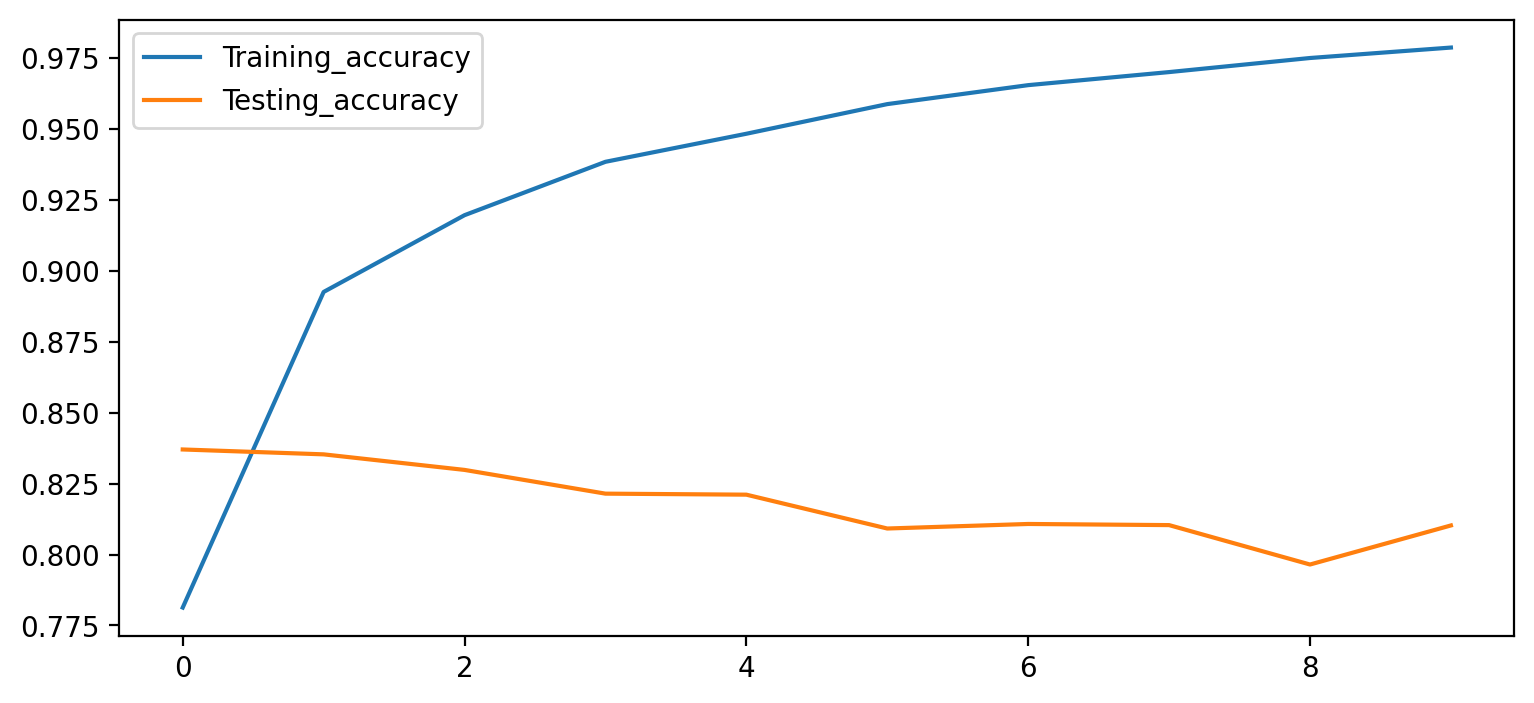

In [27]:
plt.figure(figsize = (9,4), dpi = 200)
plt.plot(train_acc, label = 'Training_accuracy')
plt.plot(val_acc, label = 'Testing_accuracy')
plt.legend()

In [28]:
train_loss = history.history['loss']
val_loss   = history.history['val_loss']

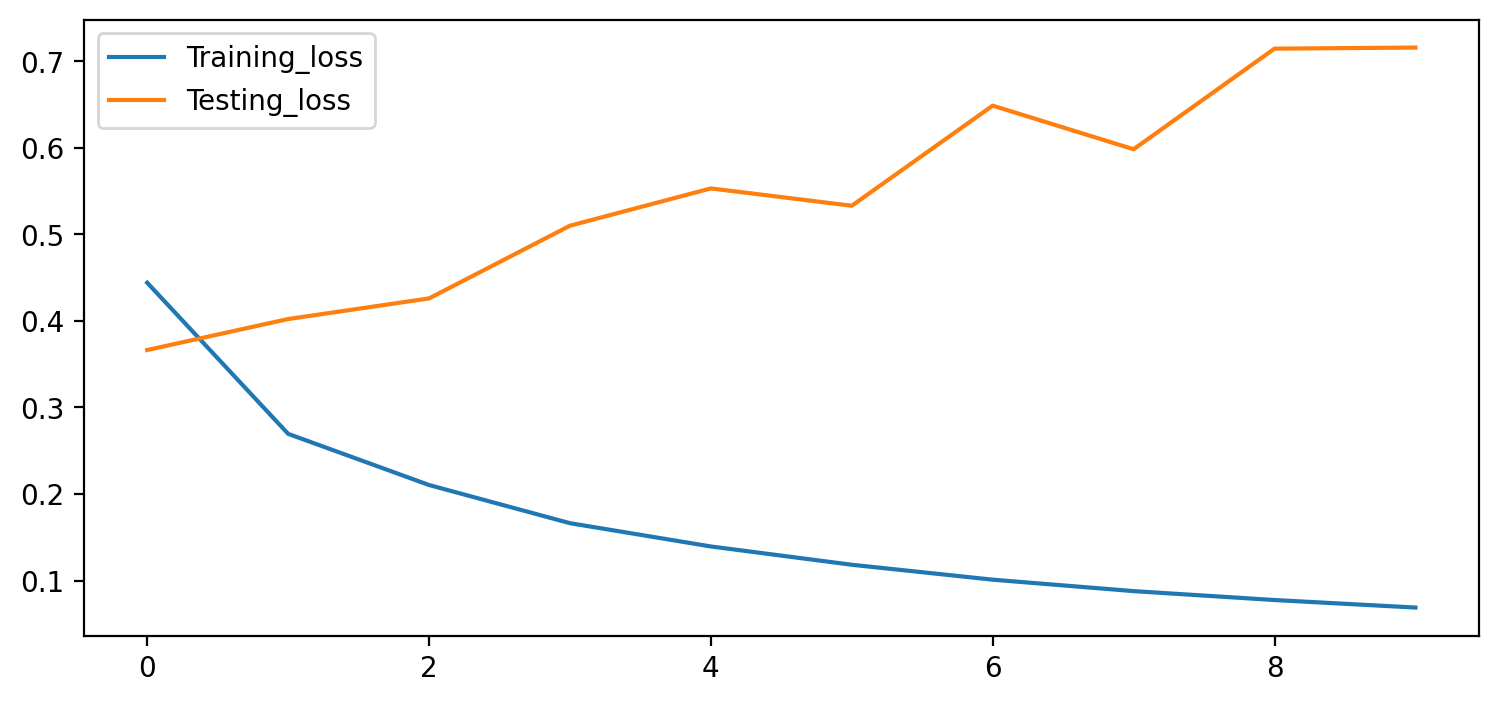

In [29]:
plt.figure(figsize = (9,4), dpi = 200)
plt.plot(train_loss, label = 'Training_loss')
plt.plot(val_loss, label = 'Testing_loss')
plt.legend()

In [30]:
#function to get the predicted output from the model by giving sequnece input
def predict_sentiment(seq):
  preds = model.predict(seq)
  for pred in preds:
    if pred > 0.5:
      print('Positive review')
    else:
      print('Negative Review')

In [31]:
#giving random input
text = """awesome"""
seq = tokenizer.texts_to_sequences([text])
pad_seq = pad_sequences(seq, maxlen = 150, truncating = 'post', padding = 'post')
predict_sentiment(pad_seq)

1/1 [==============================] - 1s 656ms/step
Negative Review
